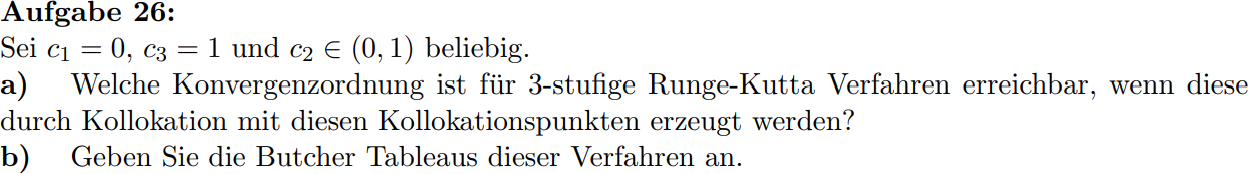

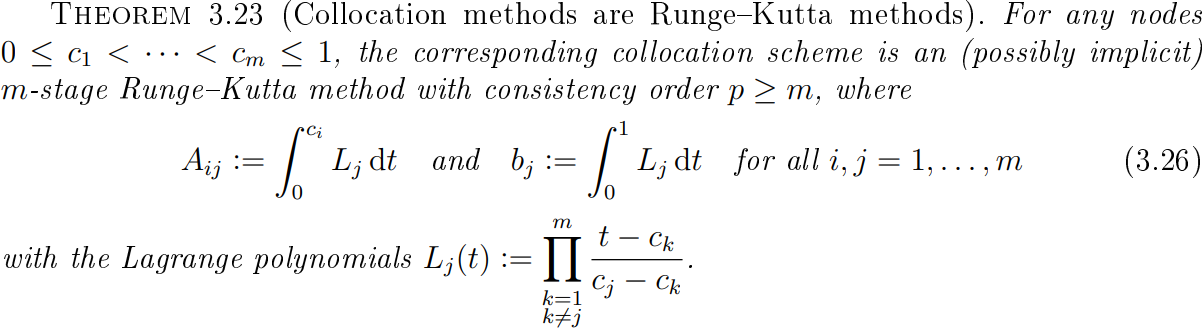

In [1]:
import sympy as sp
import numpy as np
from fractions import Fraction

In [25]:
def L(j, t, c):

    """
        returns j-th lagrange basis polynomial at t via nodes c
        
    """

    m = len(c)
    dummy = 1

    for k in range(m):
        if k != j:
            dummy *= (t - c[k])/(c[j] - c[k])

    return dummy

def apply_theorem(c):

    """
        applies theorem 3.23 (Collocation methods are RUnge-Kutta methods)
    """
    m = len(c)
    t = sp.Symbol('t')

    A = []

    for i in range(m):

        A_i = []

        for j in range(m):

            A_ij = sp.integrate(L(j, t, c), (t, 0, c[i]))
            A_i += [A_ij]

        A += [A_i]

    b = []

    for j in range(m):

        b_j = sp.integrate(L(j, t, c), (t, 0, 1))
        b += [b_j]

    c = np.array(c)
    A = np.array(A)
    b = np.array(b)

    return c, A, b

def show_results(c, decimals):

    """
        applies theorem 3.23 and shows the results with style
    """

    c, A, b = apply_theorem(c)

    c_new = []

    for i in range(len(c)):
        c_new += [str(Fraction(float(c[i])).limit_denominator(decimals))]

    c_new = np.array(c_new)
    
    A_new = []
    
    for i in range(np.shape(A)[0]):
        A_i_new = []
        for j in range(np.shape(A)[1]):
            A_i_new += [str(Fraction(float(A[i][j])).limit_denominator(decimals))]
        A_new += [A_i_new]

    A_new = np.array(A_new)

    b_new = []

    for i in range(len(b)):
        b_new += [str(Fraction(float(b[i])).limit_denominator(decimals))]

    b_new = np.array(b_new)

    print('c =')
    print(c_new)
    print('')

    print('A =')
    print(A_new)
    print('')

    print('b =')
    print(b_new)
    print('')

In [36]:
decimals = 1000

print("#", "-"*64, "#", '\n')

c = np.array([0, 1/2, 1])

# t = sp.Symbol('t')

# for j in range(len(c)):
#     expr = L(j, t, c)
#     expr = sp.expand(expr)
#     display(expr)

c, A, b = apply_theorem(c)

# display(c)
# display(A)
# display(b)

show_results(c, decimals)

c = c.astype(float)
A = A.astype(float)
b = b.astype(float)

print("#", "-"*64, "#", '\n')

# ---------------------------------------------------------------- # 

c =
['0' '1/2' '1']

A =
[['0' '0' '0']
 ['5/24' '1/3' '-1/24']
 ['1/6' '2/3' '1/6']]

b =
['1/6' '2/3' '1/6']

# ---------------------------------------------------------------- # 



In [40]:
for i in range(6):

    integral = b @ c**i #- 1/(i + 1)
    integral = Fraction(integral).limit_denominator(decimals)

    print("i =", i, "...", integral)

i = 0 ... 1
i = 1 ... 1/2
i = 2 ... 1/3
i = 3 ... 1/4
i = 4 ... 5/24
i = 5 ... 3/16
